In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

READ THE DATA

In [2]:
df=pd.read_csv('WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Text(0.5, 1.0, 'Correlation')

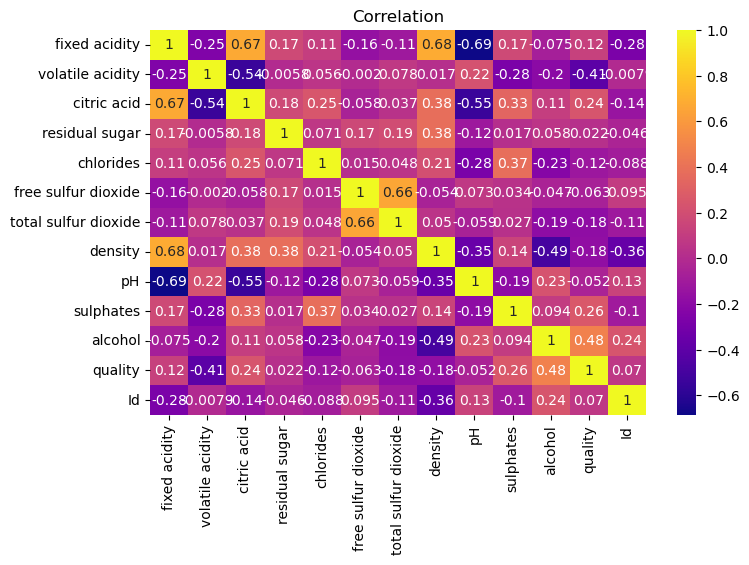

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='plasma',annot=True)
plt.title('Correlation')

Quality has high positive correlation with citric acid, sulfates, alcohol

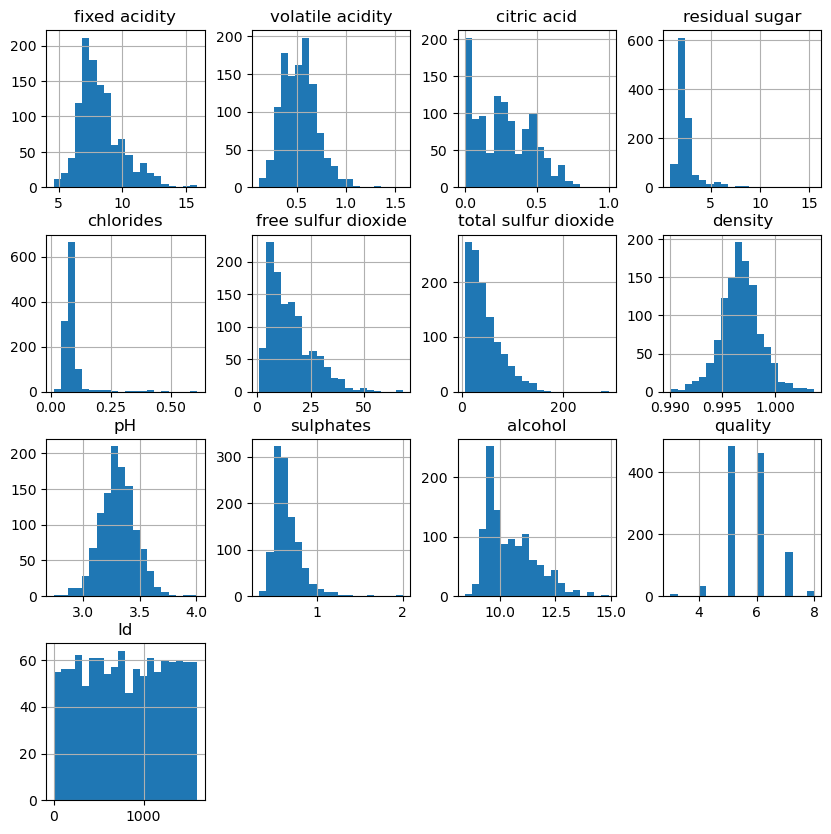

In [9]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

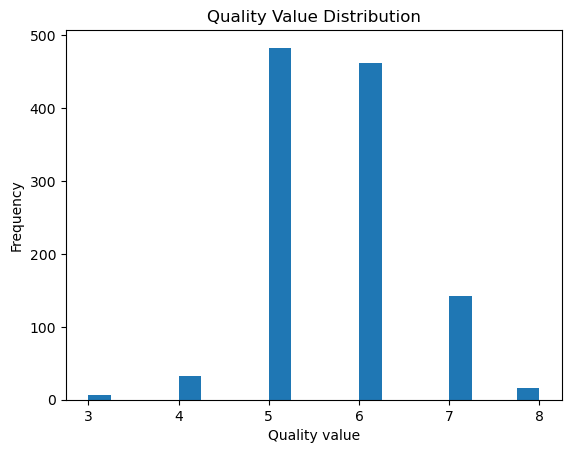

In [10]:
plt.hist(df['quality'], bins=20)
plt.xlabel('Quality value')
plt.ylabel('Frequency')
plt.title('Quality Value Distribution')
plt.show()

WE SEE THAT THE HIGHEST NUMBER OF TIMES THE WINES HAVE BEEN A GIVEN RATING OF 5

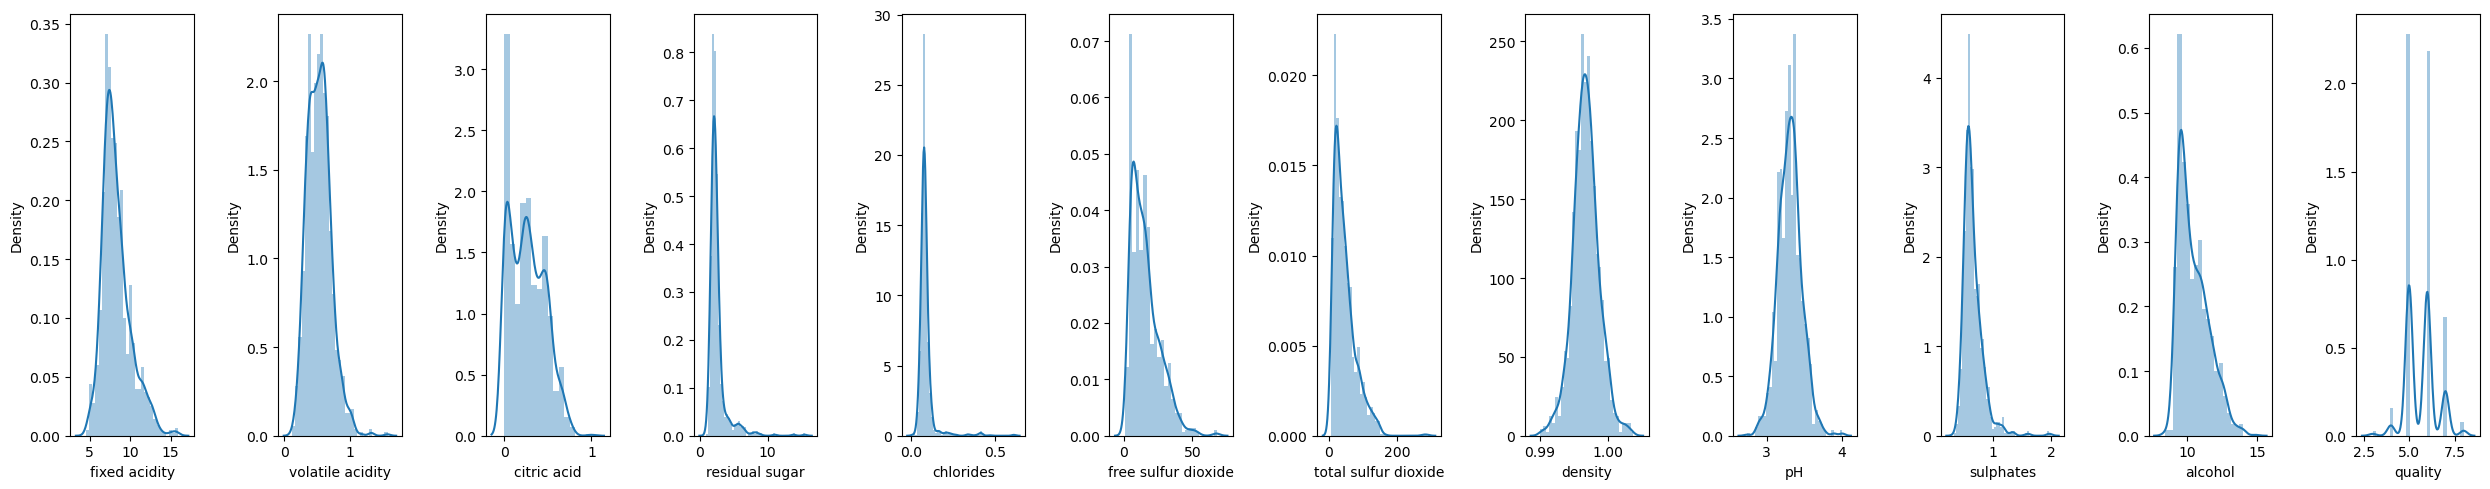

In [11]:
dfn= df.select_dtypes(include=np.number)
fig,ax= plt.subplots(1,12,figsize=(25,5))

for i,subplots in zip(dfn,ax):
    sns.distplot(dfn[i],ax=subplots)
    plt.tight_layout()

In [12]:
df.skew()

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64

SOME OF THE COLUMNS SHOW HIGH SKEWNESS WHILE THE OTHERS ARE NORMAL OR HAVE MODERATE SKEWNESS

THE QUALITY HAS HIGH CORRELATION WITH ALCOHOL LEVEL AND SULPHATES WHILE THE VOLATILE ACIDITY HAS A NEGATIVE EFFECT ON IT

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [14]:
clns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

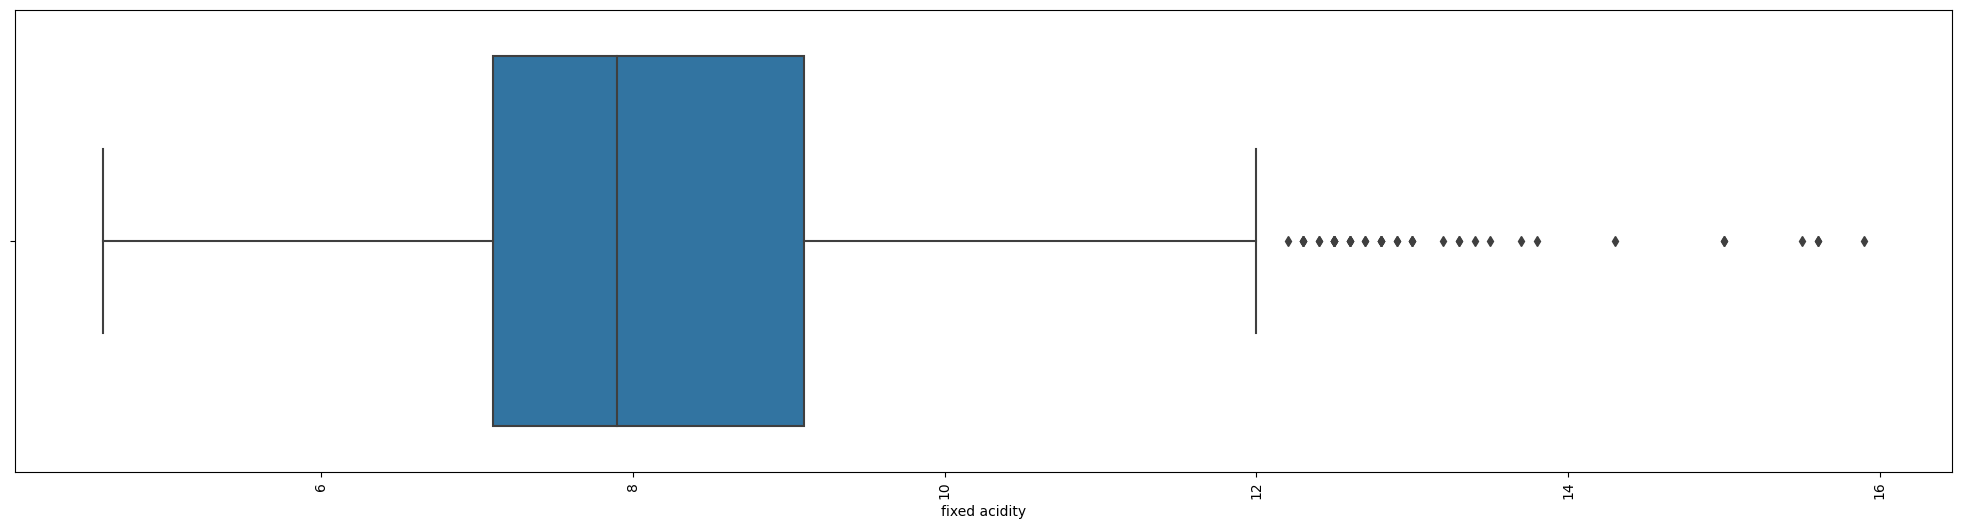

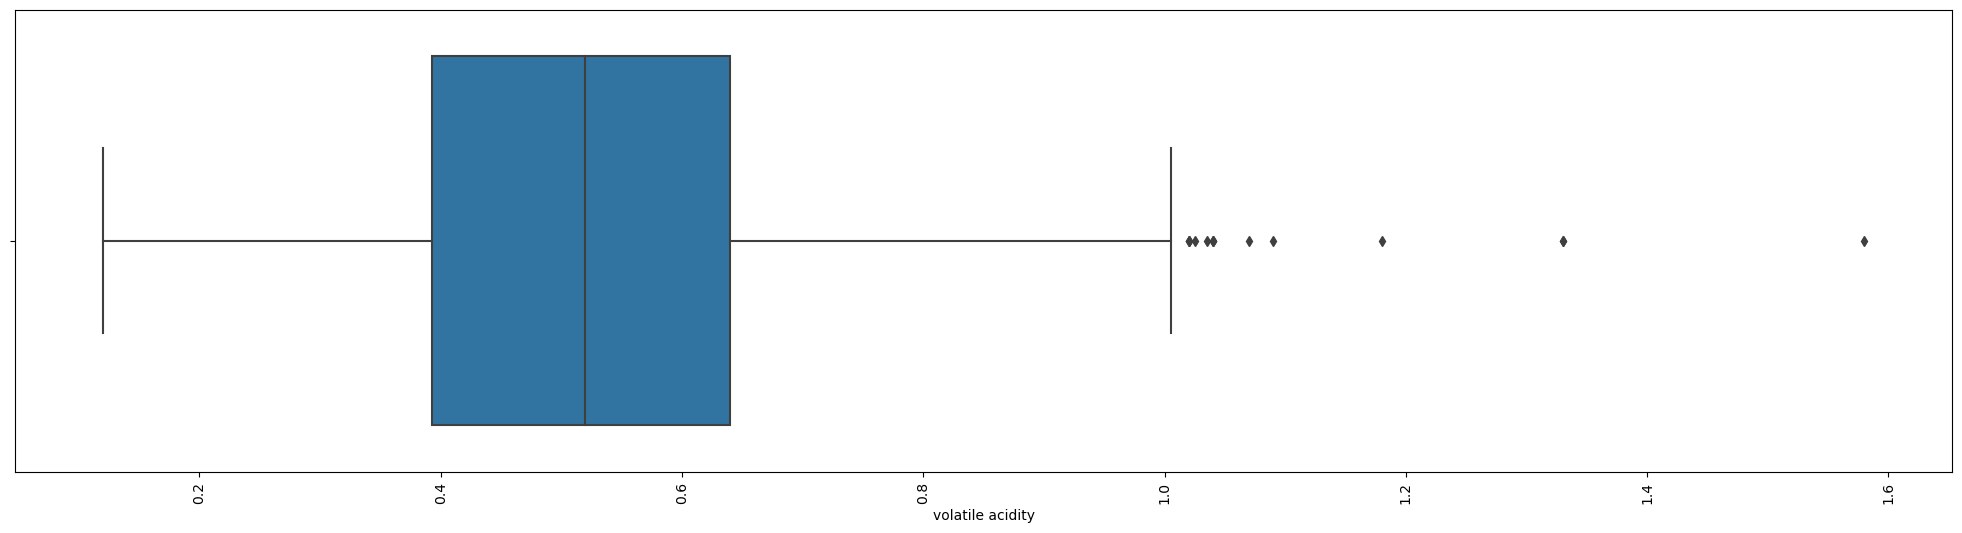

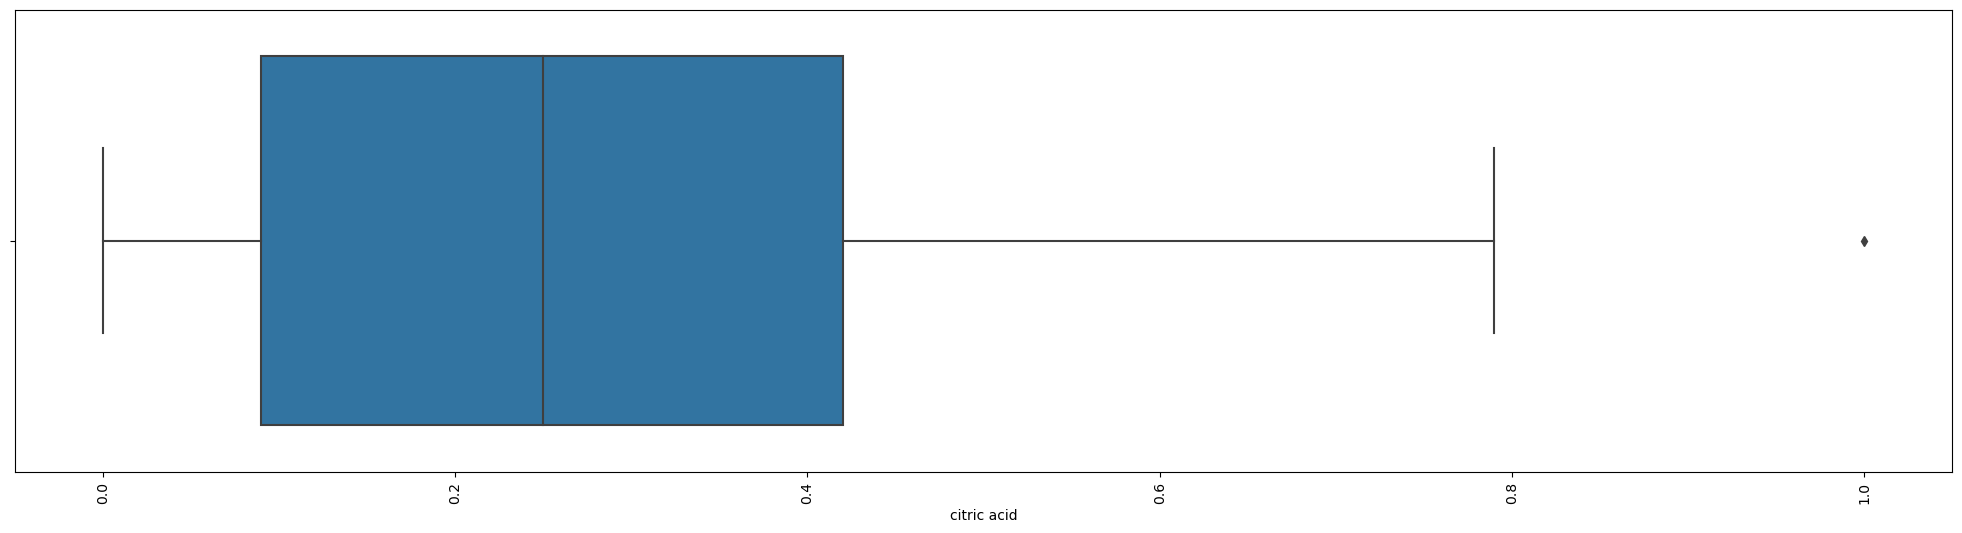

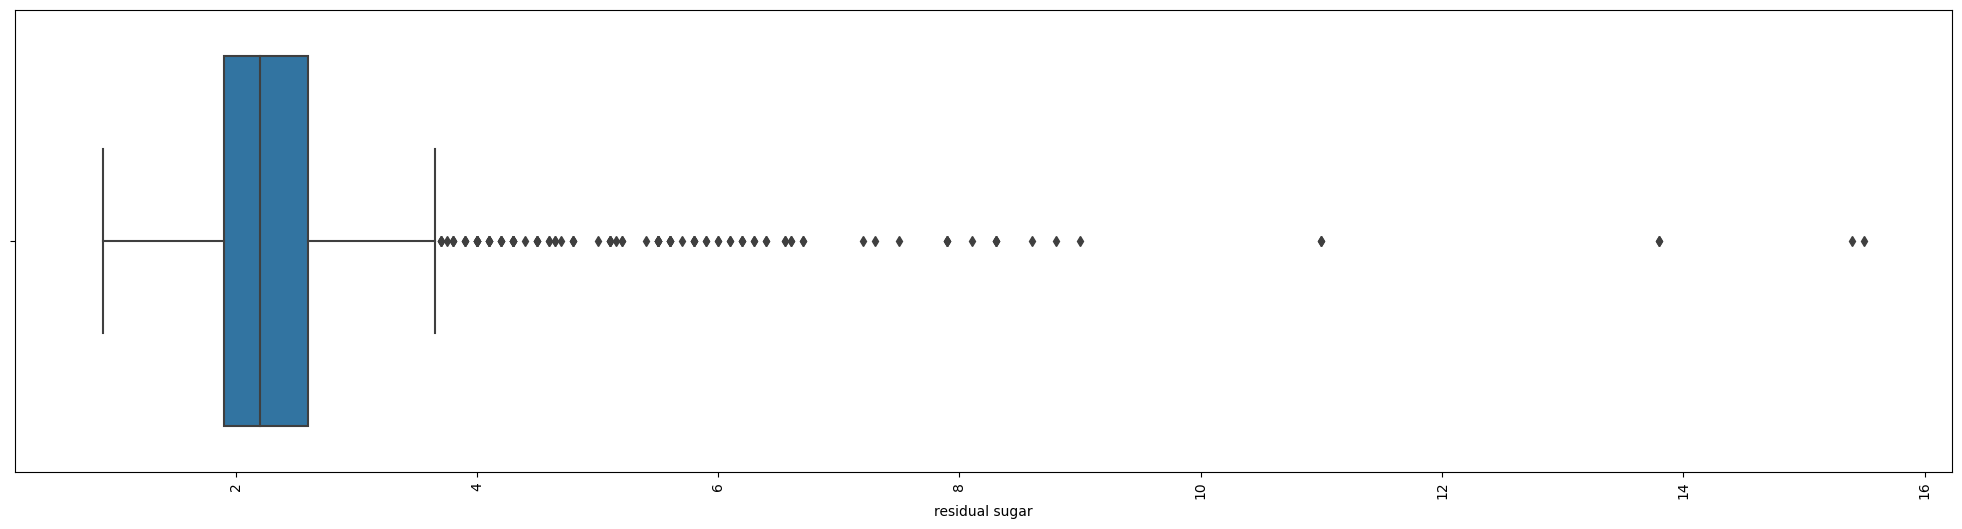

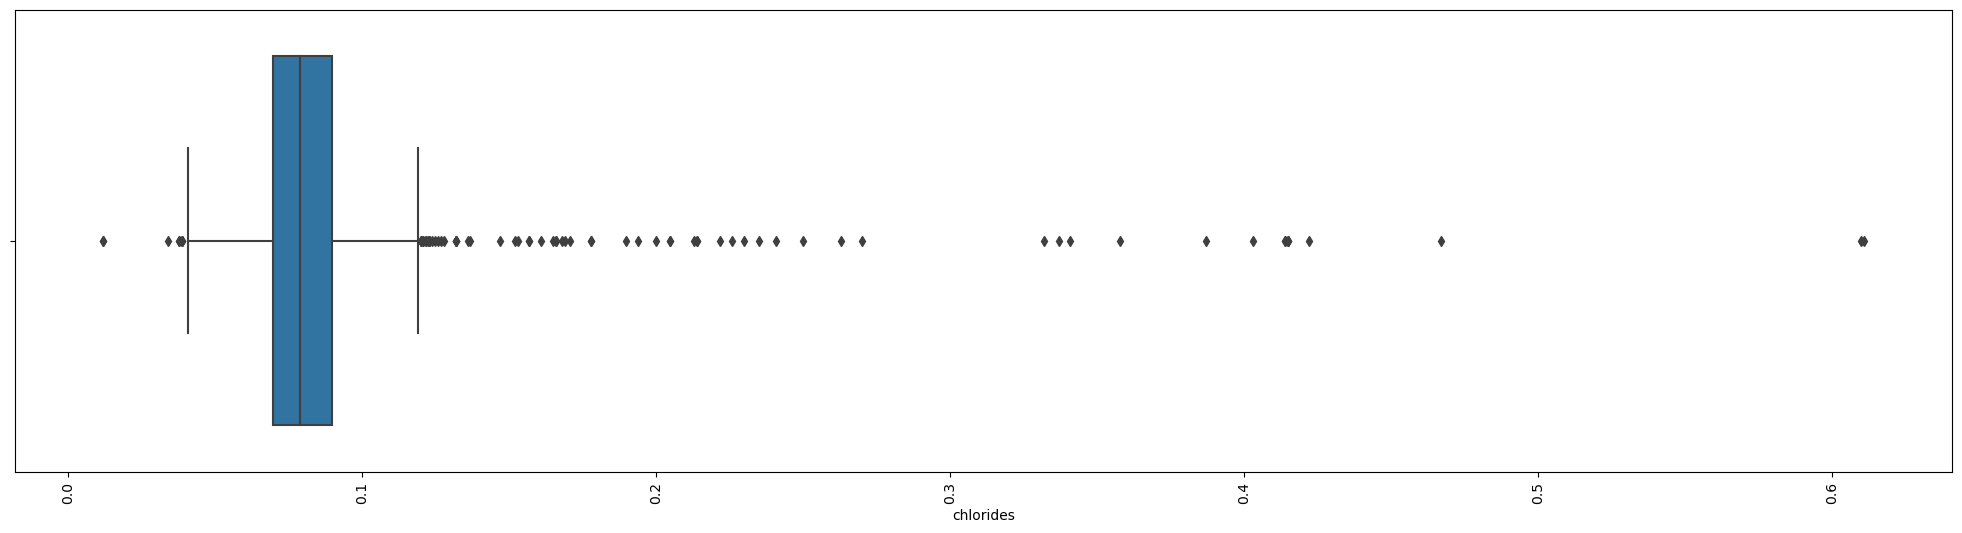

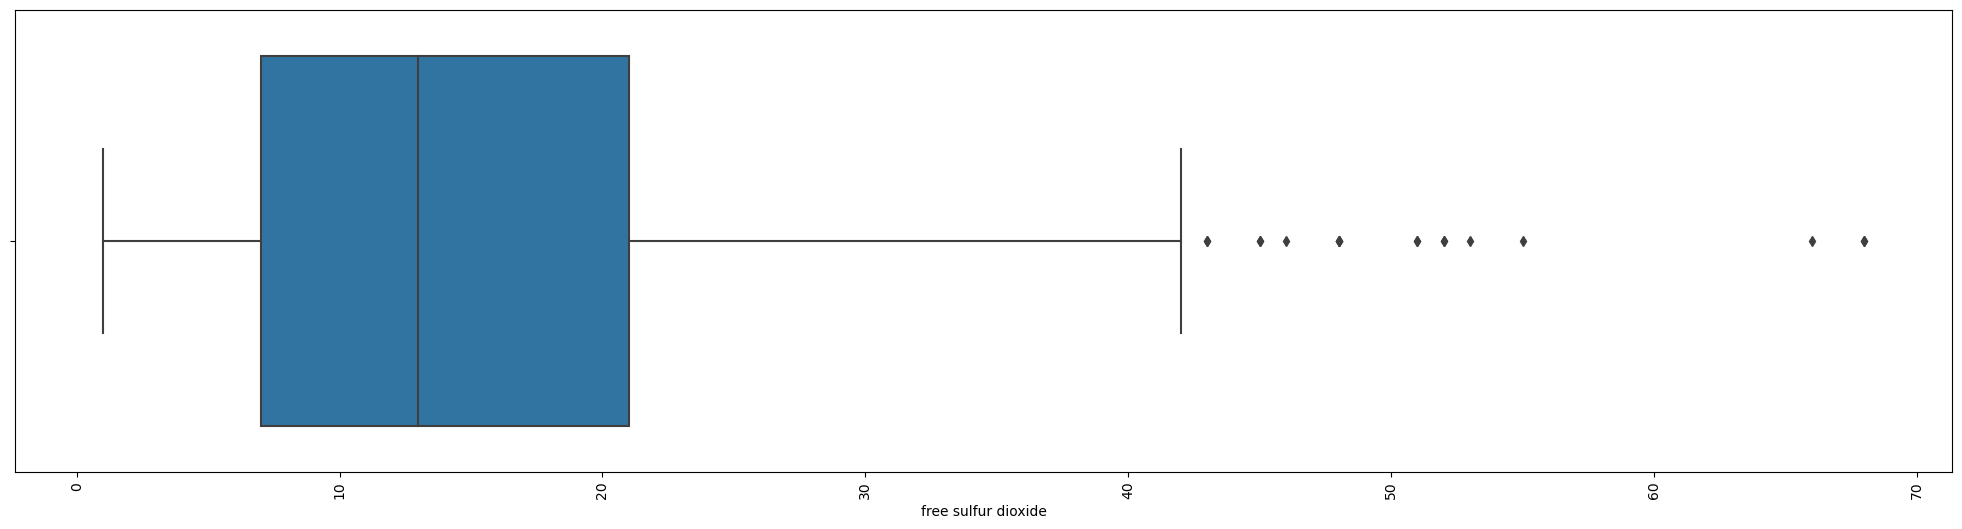

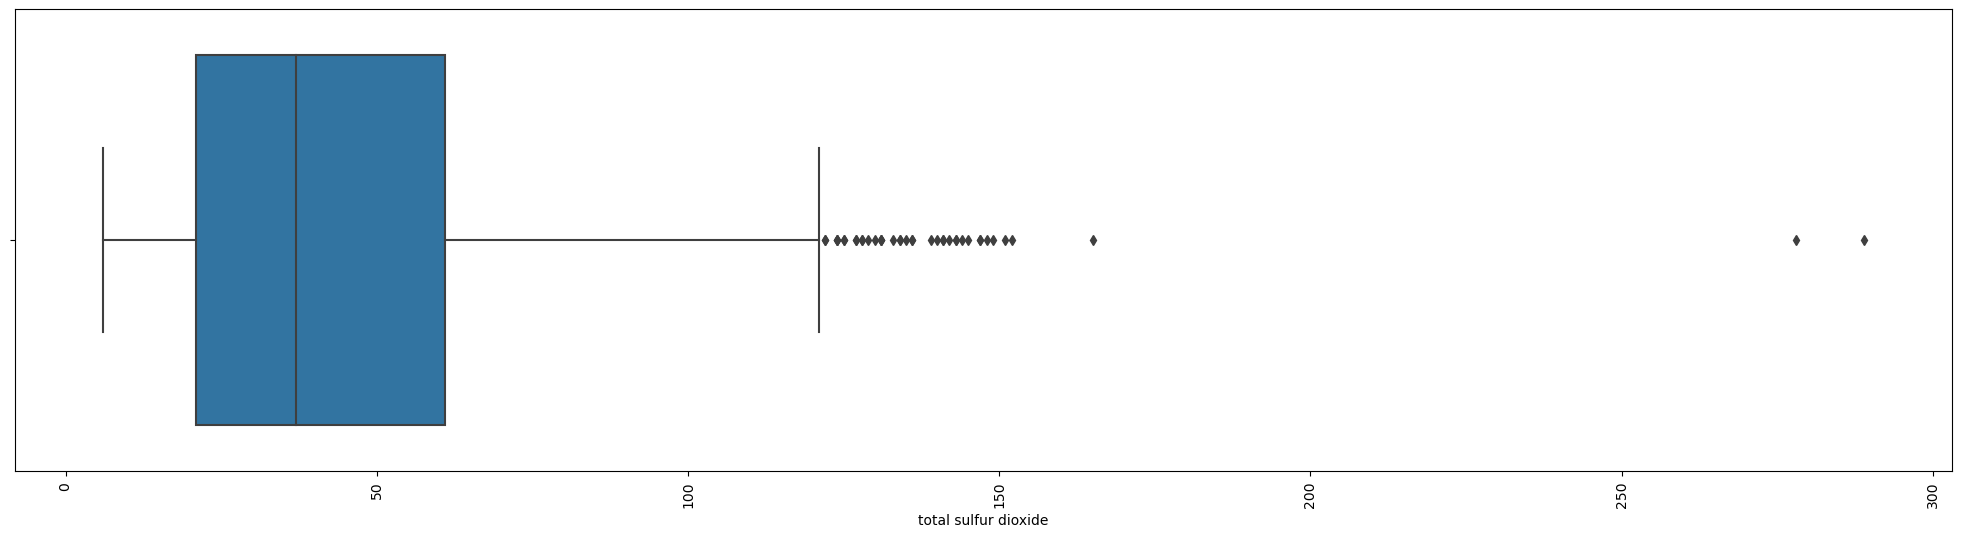

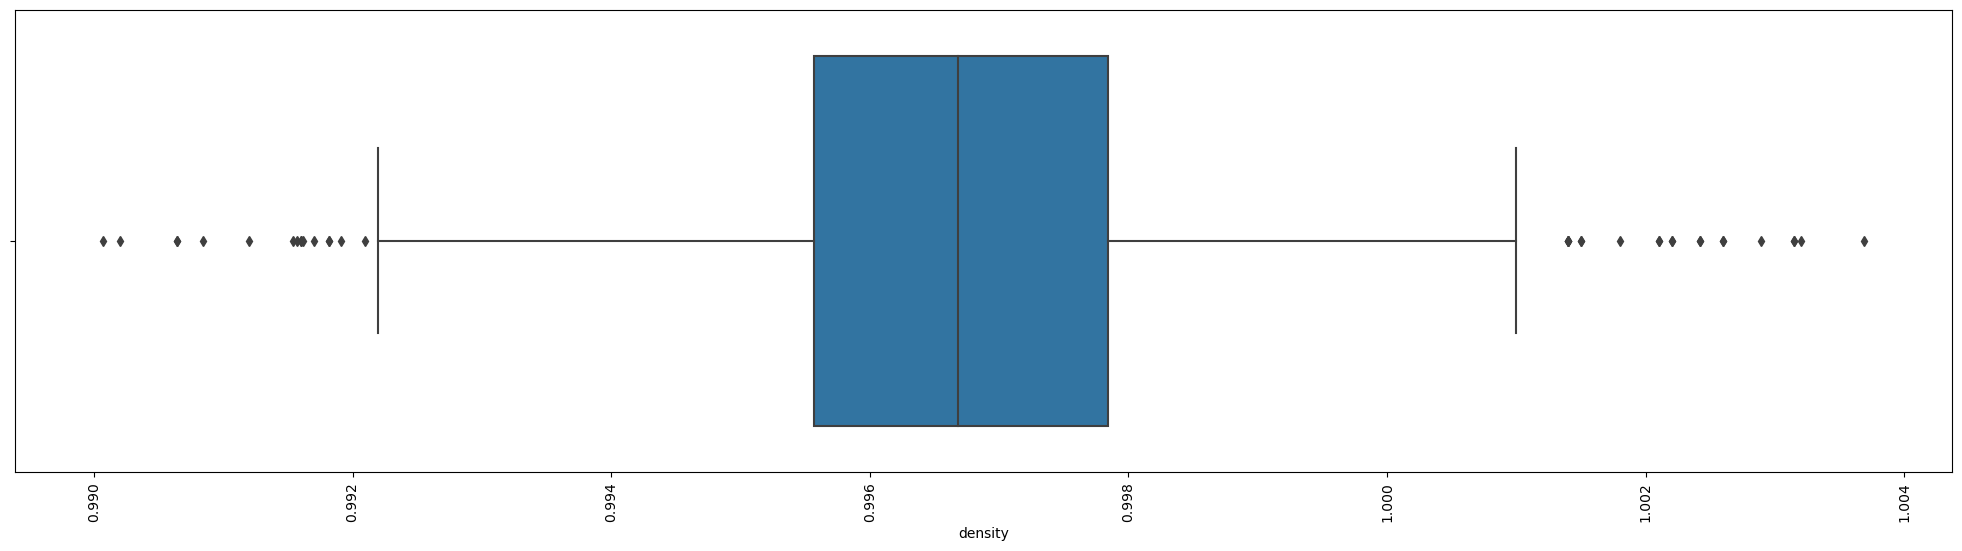

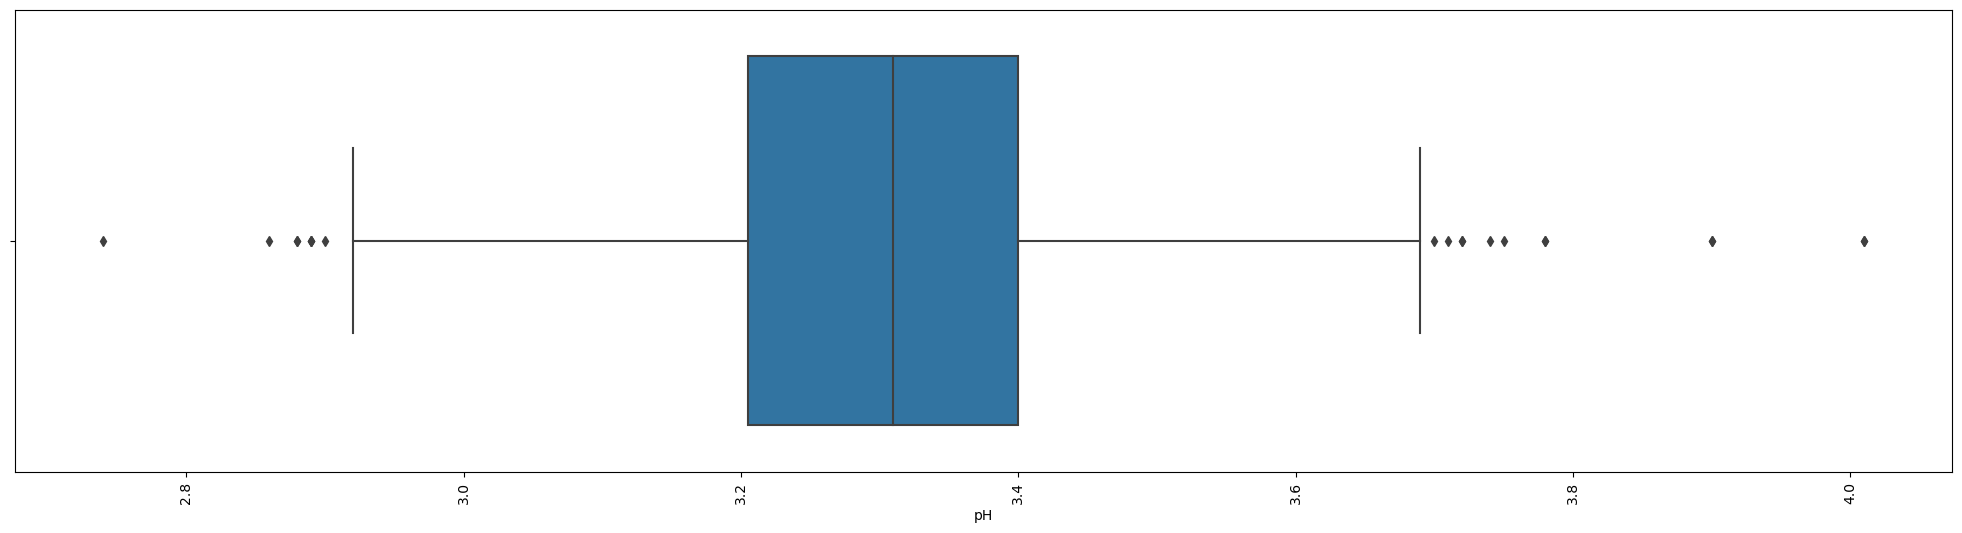

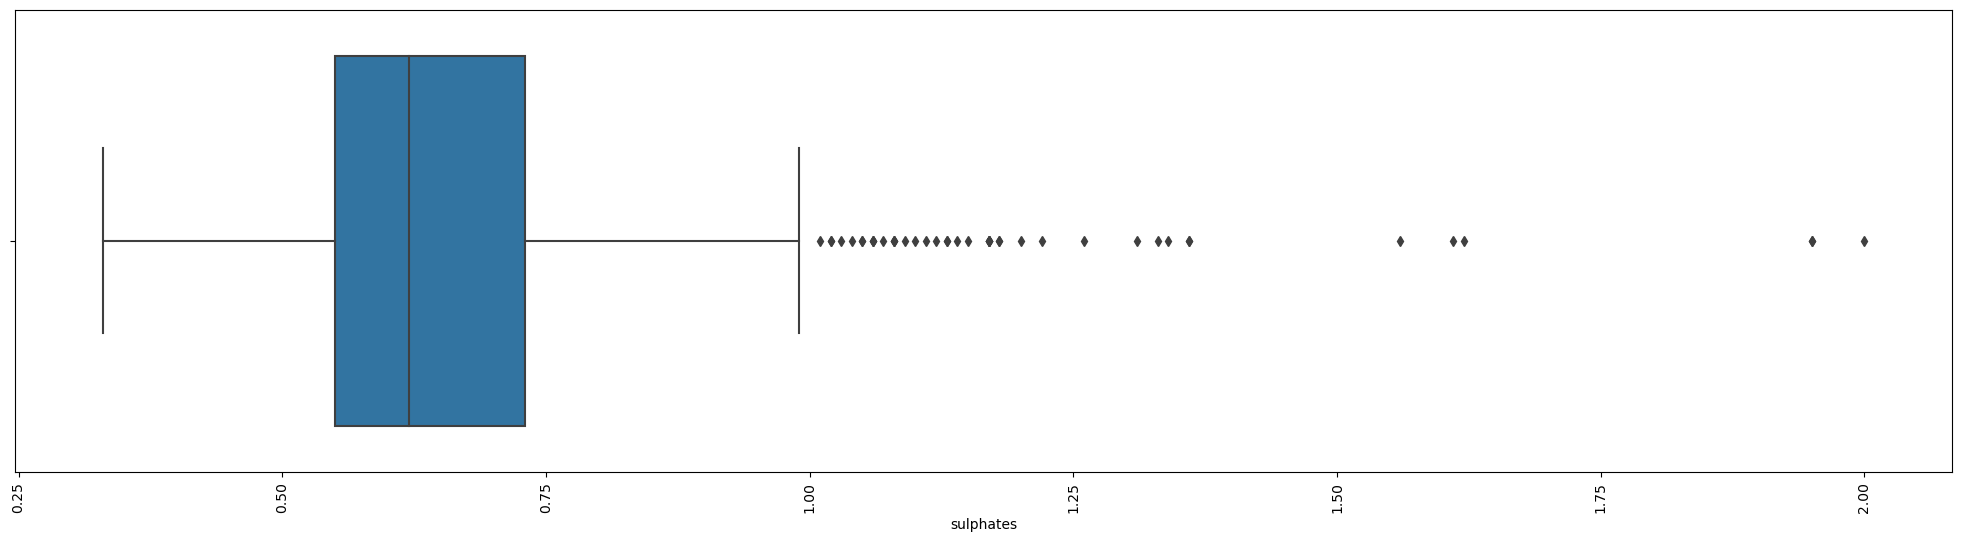

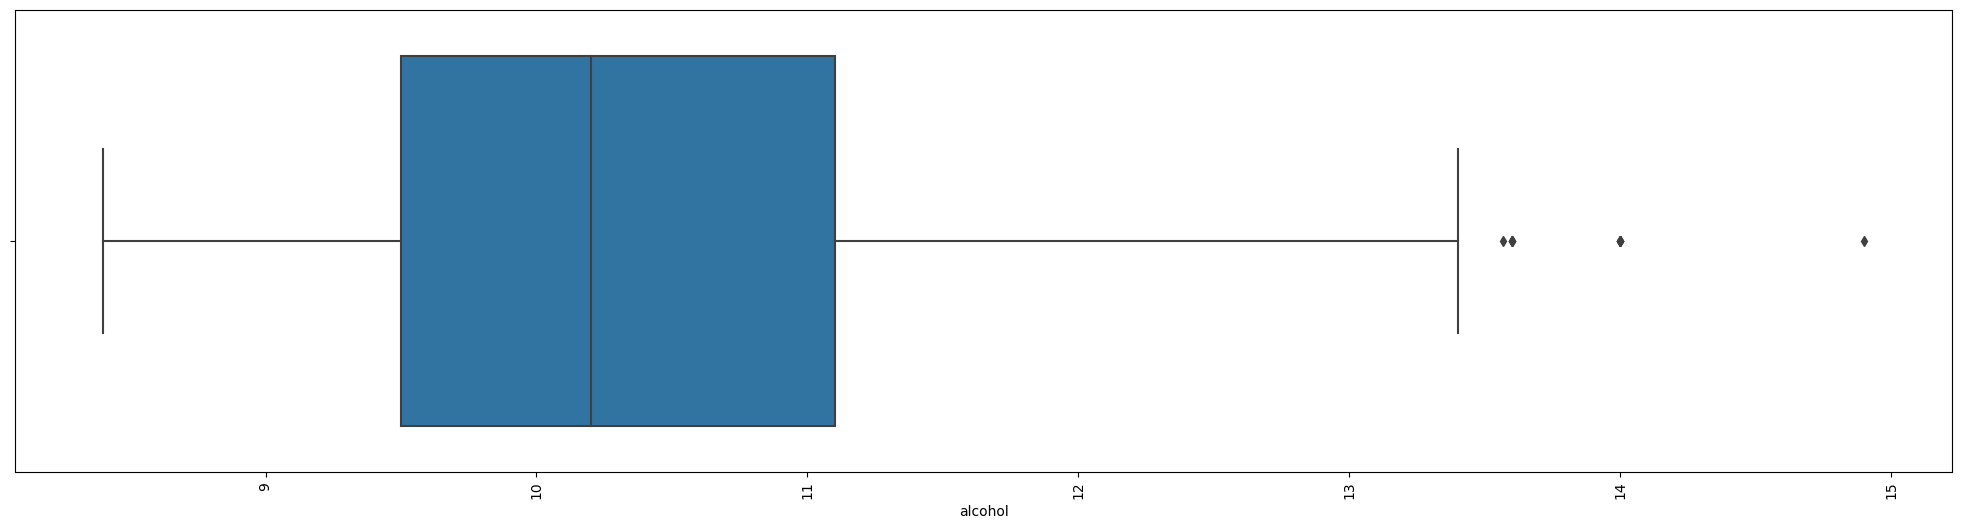

In [15]:
for cl in clns:
    plt.figure(figsize = (25,6))
    sns.boxplot(x = df[cl])
    plt.xticks(rotation=90)
    plt.show()

Data has significant outiers, will have to chose a tree based model

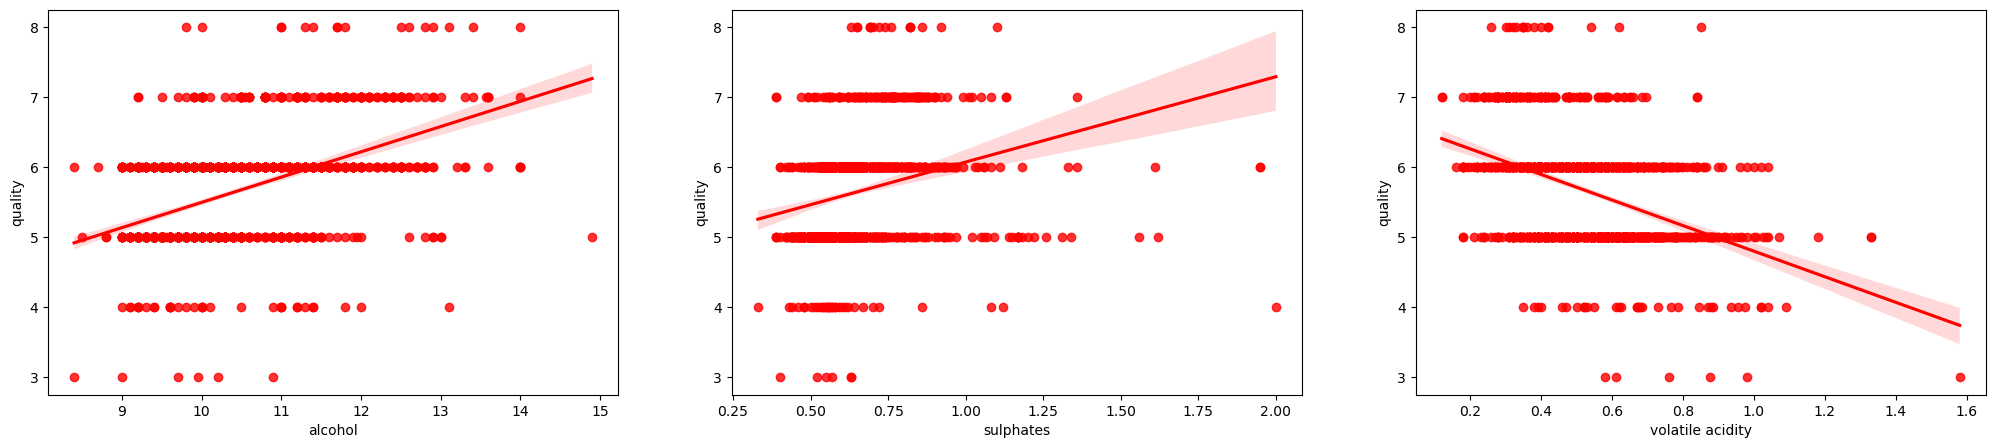

In [16]:
fig,axes=plt.subplots(1,3,figsize=(25,5))
col=['alcohol','sulphates','volatile acidity']
for i, ax in zip(col,axes):
    sns.regplot(x=df[i],y=df['quality'],color='red',ax=ax)

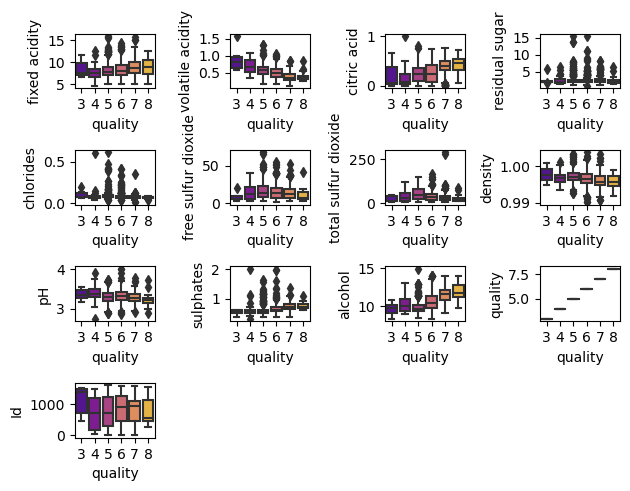

In [17]:
cols=df.columns
j=1
for col in cols:
    plt.subplot(4,4,j)
    sns.boxplot(x=df['quality'],y=col,data=df,palette='plasma')
    j+=1
    plt.tight_layout()
plt.show()

HIGH RATED WINES HAVE HIGHER ALCOHOL LEVELS, CITRIC ACID AND SULPHATES WHILE LOW QUALITY ONES HAVE HIGH VOLATILE ACIDITY, ARE MORE DENSE AND HAVE pH GREATER THAN 3.5

In [20]:
df['Target']=df['quality'].apply(lambda qval: 1 if qval>= 6 else 0)

In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,1


In [22]:
feat=['alcohol','citric acid','sulphates','pH','volatile acidity','density','total sulfur dioxide']

In [23]:
fd=pd.get_dummies(df,columns=feat,drop_first=True)
fd

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,quality,Id,Target,alcohol_8.5,alcohol_8.7,alcohol_8.8,...,total sulfur dioxide_144.0,total sulfur dioxide_145.0,total sulfur dioxide_147.0,total sulfur dioxide_148.0,total sulfur dioxide_149.0,total sulfur dioxide_151.0,total sulfur dioxide_152.0,total sulfur dioxide_165.0,total sulfur dioxide_278.0,total sulfur dioxide_289.0
0,7.4,1.9,0.076,11.0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.8,2.6,0.098,25.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.8,2.3,0.092,15.0,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.2,1.9,0.075,17.0,6,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.4,1.9,0.076,11.0,5,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,2.3,0.076,29.0,6,1592,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,6.8,1.9,0.068,28.0,6,1593,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,6.2,2.0,0.090,32.0,5,1594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,5.9,2.2,0.062,39.0,6,1595,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 975 entries, fixed acidity to total sulfur dioxide_289.0
dtypes: float64(4), int64(3), uint8(968)
memory usage: 1.1 MB


In [25]:
fd.describe()

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,quality,Id,Target,alcohol_8.5,alcohol_8.7,alcohol_8.8,...,total sulfur dioxide_144.0,total sulfur dioxide_145.0,total sulfur dioxide_147.0,total sulfur dioxide_148.0,total sulfur dioxide_149.0,total sulfur dioxide_151.0,total sulfur dioxide_152.0,total sulfur dioxide_165.0,total sulfur dioxide_278.0,total sulfur dioxide_289.0
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,2.532152,0.086933,15.615486,5.657043,804.969379,0.543307,0.000875,0.000875,0.001750,...,0.000875,0.000875,0.001750,0.000875,0.000875,0.000875,0.000875,0.000875,0.000875,0.000875
std,1.747595,1.355917,0.047267,10.250486,0.805824,463.997116,0.498339,0.029579,0.029579,0.041812,...,0.029579,0.029579,0.041812,0.029579,0.029579,0.029579,0.029579,0.029579,0.029579,0.029579
min,4.600000,0.900000,0.012000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.100000,1.900000,0.070000,7.000000,5.000000,411.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.900000,2.200000,0.079000,13.000000,6.000000,794.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.100000,2.600000,0.090000,21.000000,6.000000,1209.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.900000,15.500000,0.611000,68.000000,8.000000,1597.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# DECISION TREE CLASSIFIER

In [26]:
from sklearn.model_selection import train_test_split

In [80]:
y=fd['quality']
X=fd.drop('quality',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### ACCURACY

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.94      0.96      0.95       143
           6       0.83      0.82      0.83       146
           7       0.47      0.49      0.48        41
           8       0.25      0.25      0.25         4

    accuracy                           0.81       343
   macro avg       0.50      0.50      0.50       343
weighted avg       0.80      0.81      0.81       343



In [84]:
print(confusion_matrix(y_test,pred))

[[  0   9   0   0   0]
 [  6 137   0   0   0]
 [  0   0 120  23   3]
 [  0   0  21  20   0]
 [  0   0   3   0   1]]


In [85]:
print('Test Accuracy:', accuracy_score(y_test,pred))

Test Accuracy: 0.8104956268221575


# RANDOM FOREST CLASSIFIER

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
error_rate=[]
for i in range (1,100):
    rfc=RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i=rfc.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

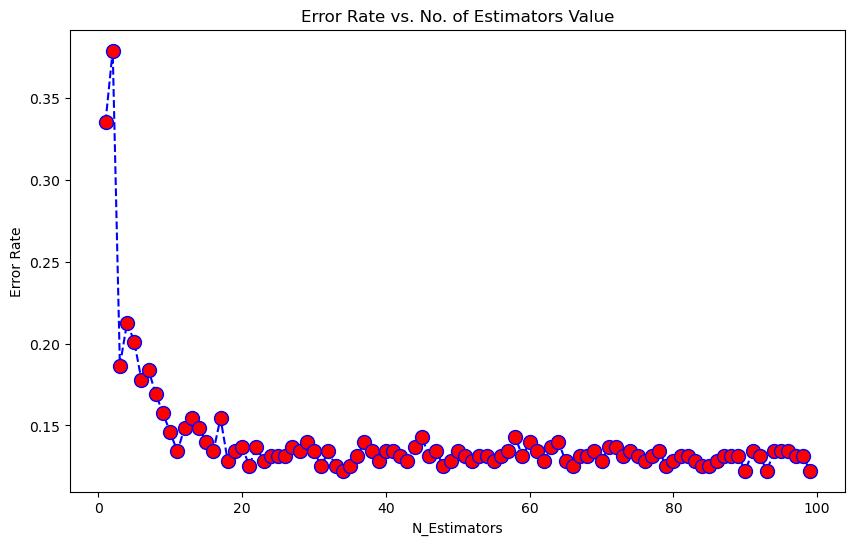

In [92]:
plt.figure(figsize= (10,6))
plt.plot(range(1,100), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. No. of Estimators Value')
plt.xlabel('N_Estimators')
plt.ylabel('Error Rate')

We see that the error rate follows a certain pattern of having its lowest value at 99

In [93]:
rfc=RandomForestClassifier(n_estimators=34)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=34)

In [94]:
pred=rfc.predict(X_test)

### ACCURACY

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.94      0.99      0.97       143
           6       0.81      0.99      0.89       146
           7       0.79      0.27      0.40        41
           8       1.00      0.25      0.40         4

    accuracy                           0.87       343
   macro avg       0.71      0.50      0.53       343
weighted avg       0.84      0.87      0.83       343



In [97]:
print(confusion_matrix(y_test,pred))

[[  0   9   0   0   0]
 [  0 142   0   1   0]
 [  0   0 144   2   0]
 [  0   0  30  11   0]
 [  0   0   3   0   1]]


In [98]:
print('Test Accuracy:', accuracy_score(y_test,pred))

Test Accuracy: 0.8688046647230321


In [99]:
MSE1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)),2)))
print("The MSE with n_estimators=34 is", MSE1)

The MSE with n_estimators=34 is 0.40765274194771794


In [100]:
rfc=RandomForestClassifier(n_estimators=99)
rfc.fit(X_train,y_train)
pred1=rfc.predict(X_test)

In [101]:
print('Test Accuracy:', accuracy_score(y_test,pred1))

Test Accuracy: 0.8688046647230321


In [102]:
MSE2=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred1)),2)))
print("The MSE with n_estimators=99 is", MSE2)

The MSE with n_estimators=99 is 0.39678004275966494


In [107]:
fd

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,quality,Id,Target,alcohol_8.5,alcohol_8.7,alcohol_8.8,...,total sulfur dioxide_144.0,total sulfur dioxide_145.0,total sulfur dioxide_147.0,total sulfur dioxide_148.0,total sulfur dioxide_149.0,total sulfur dioxide_151.0,total sulfur dioxide_152.0,total sulfur dioxide_165.0,total sulfur dioxide_278.0,total sulfur dioxide_289.0
0,7.4,1.9,0.076,11.0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.8,2.6,0.098,25.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.8,2.3,0.092,15.0,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11.2,1.9,0.075,17.0,6,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.4,1.9,0.076,11.0,5,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,2.3,0.076,29.0,6,1592,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,6.8,1.9,0.068,28.0,6,1593,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,6.2,2.0,0.090,32.0,5,1594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,5.9,2.2,0.062,39.0,6,1595,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,1
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,1
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,1


In [109]:
df.drop('Target',axis=1, inplace=True)

In [110]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [111]:
df.drop('Id',axis=1,inplace=True)

In [112]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# MAKING SOME PREDICTIONS

In [113]:
y=df['quality']
X=df.drop('quality',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
rfc=RandomForestClassifier(n_estimators=99)
rfc.fit(X_train,y_train)
pred1=rfc.predict(X_test)

In [116]:
data = (2.3,0.44,0.00,1.5,0.082,10.5,32.0,0.99999,3.22,0.23,9.1)
data1 =np.array(data)
data2= data1.reshape(1,-1)
pred = rfc.predict(data2)
print(pred)

[5]
